In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [6]:
df_visualization_nominal=df[['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex']].copy()

In [7]:
df_visualization_nominal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex'], dtype='object')

In [8]:
import seaborn as sns

Male      358
Female     39
Name: sex, dtype: int64


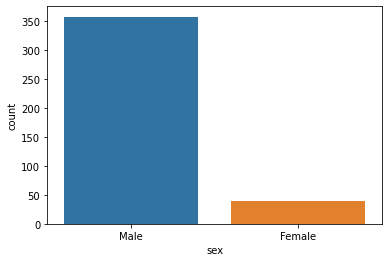

In [9]:
ax=sns.countplot(x="sex",data=df_visualization_nominal)
print(df_visualization_nominal["sex"].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


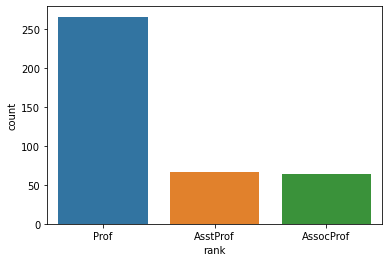

In [10]:
ax=sns.countplot(x="rank",data=df_visualization_nominal)
print(df_visualization_nominal["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


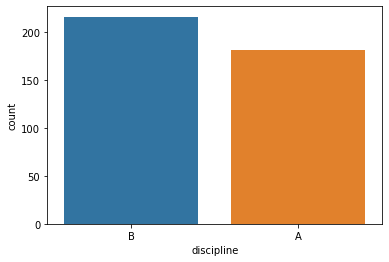

In [11]:
ax=sns.countplot(x="discipline",data=df_visualization_nominal)
print(df_visualization_nominal["discipline"].value_counts())

In [26]:
df1=pd.get_dummies(df[['rank','discipline','sex']],drop_first=True)
df1

,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,0,1,1,1
1,0,1,1,1
2,1,0,1,1
3,0,1,1,1
4,0,1,1,1
...,...,...,...,...
392,0,1,0,1
393,0,1,0,1
394,0,1,0,1
395,0,1,0,1


In [27]:
X=pd.get_dummies(df,columns=['rank','discipline','sex'],drop_first=True)
X

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1
...,...,...,...,...,...,...,...
392,33,30,103106,0,1,0,1
393,31,19,150564,0,1,0,1
394,42,25,101738,0,1,0,1
395,25,15,95329,0,1,0,1


<AxesSubplot:xlabel='rank', ylabel='salary'>

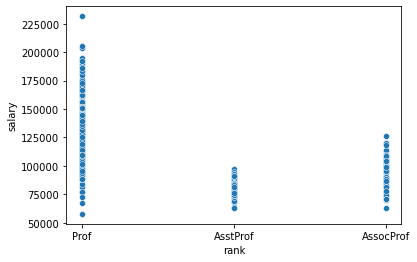

In [14]:
sns.scatterplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

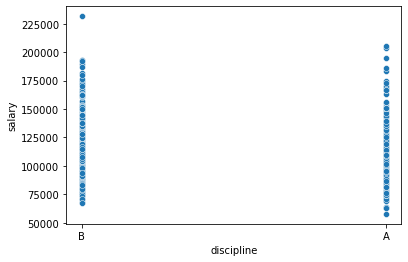

In [15]:
sns.scatterplot(x='discipline',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

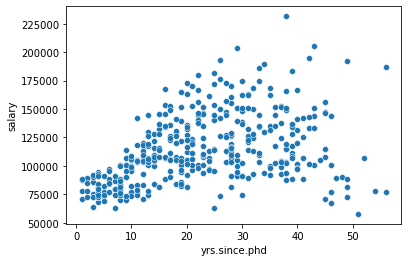

In [16]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

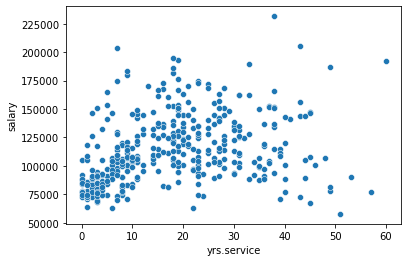

In [17]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

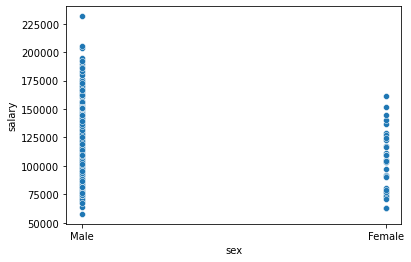

In [18]:
sns.scatterplot(x='sex',y='salary',data=df)

In [28]:
X

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1
...,...,...,...,...,...,...,...
392,33,30,103106,0,1,0,1
393,31,19,150564,0,1,0,1
394,42,25,101738,0,1,0,1
395,25,15,95329,0,1,0,1


In [31]:
x=X.drop(['salary'],axis=1)

In [32]:
x

,yrs.since.phd,yrs.service,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,0,1,1,1
1,20,16,0,1,1,1
2,4,3,1,0,1,1
3,45,39,0,1,1,1
4,40,41,0,1,1,1
...,...,...,...,...,...,...
392,33,30,0,1,0,1
393,31,19,0,1,0,1
394,42,25,0,1,0,1
395,25,15,0,1,0,1


In [37]:
y=df.salary

In [38]:
Scaler=StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [39]:
x_scaled

array([[-0.25754973,  0.02966908, -0.45058884,  0.70177005,  0.91540317,
         0.3300584 ],
       [-0.17985426, -0.12429986, -0.45058884,  0.70177005,  0.91540317,
         0.3300584 ],
       [-1.42298184, -1.12509795,  2.21931817, -1.42496819,  0.91540317,
         0.3300584 ],
       ...,
       [ 1.52944617,  0.56856036, -0.45058884,  0.70177005, -1.09241483,
         0.3300584 ],
       [ 0.20862311, -0.20128433, -0.45058884,  0.70177005, -1.09241483,
         0.3300584 ],
       [-1.11219995, -1.04811348,  2.21931817, -1.42496819, -1.09241483,
         0.3300584 ]])

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=49)
y_train.head()

211    111350
93     166024
252    132000
293    104800
326    124714
Name: salary, dtype: int64

In [42]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [44]:
regression.score(x_train,y_train)

0.4735640621725631

In [45]:
regression.score(x_test,y_test)

0.3655202380800876

In [47]:
y_pred=regression.predict(x_test)
y_pred

array([128791.76874827, 118299.01687487, 133659.72905507, 117412.0376752 ,
       102900.27517437, 135433.68745441, 118389.6734868 , 102005.05446453,
       118964.50993289, 134321.10135801, 118040.44393743,  86724.57104274,
       118402.03575206,  86880.64241952, 118529.26184323, 117975.02917258,
       119005.71748377, 133865.24949291,  81349.37539805, 118036.32318235,
       134772.83246802, 119334.34325769, 130384.9312403 , 117909.09709117,
       133840.52496238, 117757.14646947,  65929.30361982,  86130.799848  ,
       134238.68625625, 121987.03934653, 133322.86177097, 121403.96139026,
       135676.29468804, 101553.32335452, 120319.70326292,  70978.05983393,
       117761.26722456, 119268.41117629, 117617.55811304, 117917.33860135,
       133680.33283051, 119753.108327  , 119137.06433003, 117432.64145064,
        85675.46529945, 117486.21126678, 135663.93242277, 133782.83439116,
       135639.20789225, 133696.81585086, 117757.14646947, 133516.01994355,
       118562.22788393,  

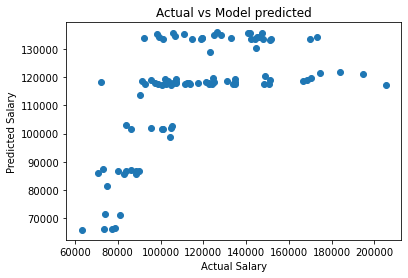

In [49]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Model predicted')
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=regression.predict(x_test)
mean_absolute_error(y_test,y_pred)

17351.05747853818

In [51]:
mean_squared_error(y_test,y_pred)

557862631.3538806

In [52]:
np.sqrt(mean_squared_error(y_test,y_pred))

23619.115803811976